In [0]:
from datetime import datetime
print("Current Date/Time: ",datetime.now())

Current Date/Time:  2020-03-21 15:10:52.107736


In [0]:
!pip install -U git+https://github.com/albu/albumentations > /dev/null && echo "All libraries are successfully installed!"

  Running command git clone -q https://github.com/albu/albumentations /tmp/pip-req-build-quwocwpd
All libraries are successfully installed!


In [0]:
from torchvision import datasets
train = datasets.CIFAR10('./data', train=True, download=True)

Files already downloaded and verified


In [0]:
from tqdm import tqdm_notebook
from PIL import Image
import numpy as np
n = 0
s = np.zeros(3)
sq = np.zeros(3)
for data, l in tqdm_notebook(train):
  x = np.array(data)/255
  s += x.sum(axis=(0,1))
  sq += np.sum(np.square(x), axis=(0,1))
  n += x.shape[0]*x.shape[1]

mu = s/n
std = np.sqrt((sq/n - np.square(mu)))
print(mu, sq/n, std, n)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  import sys



[0.49139968 0.48215841 0.44653091] [0.30249857 0.29176174 0.26781806] [0.24703223 0.24348513 0.26158784] 51200000


In [0]:
import numpy as np
from evadatatransforms import AlbumentationTransforms
import albumentations as A

channel_means = (0.49139968, 0.48215841, 0.44653091)
channel_stdevs = (0.24703223, 0.24348513, 0.26158784)
# Train Phase transformations
train_transforms = AlbumentationTransforms([
                                       A.Rotate((-30.0, 30.0)),
                                       A.HorizontalFlip(),
                                       A.RGBShift(r_shift_limit=50, g_shift_limit=50, b_shift_limit=50, p=0.5),
                                       A.Normalize(mean=channel_means, std=channel_stdevs),
                                       A.Cutout(num_holes=4) # fillvalue is 0 after normalizing as mean is 0
                                       ])

fillmeans = (np.array(channel_means)).astype(np.uint8)



# Test Phase transformations
test_transforms = AlbumentationTransforms([A.Normalize(mean=channel_means, std=channel_stdevs)])



In [0]:
from torchvision import datasets
train = datasets.CIFAR10('./data', train=True, download=True, transform=train_transforms)
test = datasets.CIFAR10('./data', train=False, download=True, transform=test_transforms)

Files already downloaded and verified
Files already downloaded and verified


In [0]:
import dataloaders

dataloader = dataloaders.DataLoader(batch_size=128)

# train dataloader
train_loader = dataloader.load(train)

# test dataloader
test_loader = dataloader.load(test)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([128, 3, 32, 32])
torch.Size([128])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


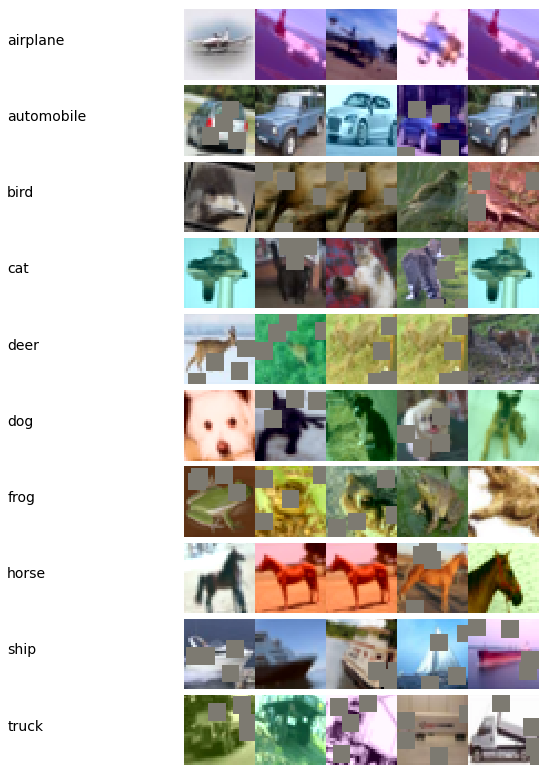

In [0]:
from __future__ import print_function
def unnormalize(img):
  img = img.numpy().astype(dtype=np.float32)
  
  for i in range(img.shape[0]):
    img[i] = (img[i]*channel_stdevs[i])+channel_means[i]
  
  return np.transpose(img, (1,2,0))

%matplotlib inline
import matplotlib.pyplot as plt
dataiter = iter(train_loader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

num_classes = 10
# display 10 images from each category. 
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
r, c = 10, 11
n = 5
fig = plt.figure(figsize=(14,14))
fig.subplots_adjust(hspace=0.01, wspace=0.01)
for i in range(num_classes):
    idx = np.random.choice(np.where(labels[:]==i)[0], n)
    ax = plt.subplot(r, c, i*c+1)
    ax.text(-1.5, 0.5, class_names[i], fontsize=14)
    plt.axis('off')
    for j in range(1, n+1):
      plt.subplot(r, c, i*c+j+1)
      plt.imshow(unnormalize(images[idx[j-1]]), interpolation='none')
      plt.axis('off')
plt.show()

In [0]:

from QuizDNN import QuizDNN
import torch
model = QuizDNN() # error here is positional arguments are 0 but in function args are there.
use_cuda = torch.cuda.is_available()
model.device = torch.device("cuda" if use_cuda else "cpu")
model.to(model.device)
model.summary((3,32,32))



----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
            Conv2d-7           [-1, 64, 32, 32]          36,864
        BasicBlock-8  [[-1, 64, 32, 32], [-1, 64, 32, 32], [-1, 64, 32, 32], [-1, 64, 32, 32]]               0
         MaxPool2d-9           [-1, 64, 16, 16]               0
      BatchNorm2d-10           [-1, 64, 16, 16]             128
           Conv2d-11          [-1, 128, 16, 16]          73,728
           Conv2d-12          [-1, 128, 16, 16]           8,192
      BatchNorm2d-13          [-1, 128, 16, 16]         

In [0]:
#from torch.optim.lr_scheduler import StepLR
import torch.optim as optim
from torch.optim.lr_scheduler import OneCycleLR
EPOCHS = 25
L2lambda = 0
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, nesterov=True, weight_decay=L2lambda)
#scheduler = StepLR(optimizer, step_size=5, gamma=0.5)
scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.5, steps_per_epoch=len(train_loader), epochs=EPOCHS)
L1lambda = 0
model.gotrain(optimizer, train_loader, test_loader, EPOCHS, "/content/drive/My Drive", scheduler, True, L1lambda)


Validation loss decreased (100000.000000 --> 1.182754).  Saving model ...
Epoch: 1, Train set: Average loss: 0.0116, Accuracy: 46.11%; Test set: Average loss: 1.1828, Accuracy: 58.55%
Learning Rate = 0.040763



Validation loss decreased (1.182754 --> 1.145695).  Saving model ...
Epoch: 2, Train set: Average loss: 0.0089, Accuracy: 59.70%; Test set: Average loss: 1.1457, Accuracy: 63.39%
Learning Rate = 0.099460



Validation loss decreased (1.145695 --> 0.814622).  Saving model ...
Epoch: 3, Train set: Average loss: 0.0076, Accuracy: 66.24%; Test set: Average loss: 0.8146, Accuracy: 71.52%
Learning Rate = 0.185934



Epoch: 4, Train set: Average loss: 0.0067, Accuracy: 70.23%; Test set: Average loss: 0.8263, Accuracy: 73.24%
Learning Rate = 0.285223



Validation loss decreased (0.814622 --> 0.714719).  Saving model ...
Epoch: 5, Train set: Average loss: 0.0062, Accuracy: 72.78%; Test set: Average loss: 0.7147, Accuracy: 75.42%
Learning Rate = 0.380148



Validation loss decreased (0.714719 --> 0.658830).  Saving model ...
Epoch: 6, Train set: Average loss: 0.0058, Accuracy: 74.41%; Test set: Average loss: 0.6588, Accuracy: 78.19%
Learning Rate = 0.454285



Validation loss decreased (0.658830 --> 0.640094).  Saving model ...
Epoch: 7, Train set: Average loss: 0.0054, Accuracy: 76.12%; Test set: Average loss: 0.6401, Accuracy: 78.46%
Learning Rate = 0.494805



Validation loss decreased (0.640094 --> 0.522980).  Saving model ...
Epoch: 8, Train set: Average loss: 0.0051, Accuracy: 77.78%; Test set: Average loss: 0.5230, Accuracy: 82.52%
Learning Rate = 0.498983



Epoch: 9, Train set: Average loss: 0.0048, Accuracy: 79.30%; Test set: Average loss: 0.6761, Accuracy: 80.30%
Learning Rate = 0.490960



Validation loss decreased (0.522980 --> 0.488981).  Saving model ...
Epoch: 10, Train set: Average loss: 0.0045, Accuracy: 80.12%; Test set: Average loss: 0.4890, Accuracy: 83.98%
Learning Rate = 0.475192



Epoch: 11, Train set: Average loss: 0.0043, Accuracy: 81.26%; Test set: Average loss: 0.5011, Accuracy: 83.61%
Learning Rate = 0.452187



Validation loss decreased (0.488981 --> 0.475759).  Saving model ...
Epoch: 12, Train set: Average loss: 0.0040, Accuracy: 82.08%; Test set: Average loss: 0.4758, Accuracy: 84.48%
Learning Rate = 0.422683



Validation loss decreased (0.475759 --> 0.406487).  Saving model ...
Epoch: 13, Train set: Average loss: 0.0038, Accuracy: 83.30%; Test set: Average loss: 0.4065, Accuracy: 86.65%
Learning Rate = 0.387629



Epoch: 14, Train set: Average loss: 0.0036, Accuracy: 83.94%; Test set: Average loss: 0.4141, Accuracy: 86.36%
Learning Rate = 0.348151



Validation loss decreased (0.406487 --> 0.405852).  Saving model ...
Epoch: 15, Train set: Average loss: 0.0034, Accuracy: 84.86%; Test set: Average loss: 0.4059, Accuracy: 87.20%
Learning Rate = 0.305519



Validation loss decreased (0.405852 --> 0.394874).  Saving model ...
Epoch: 16, Train set: Average loss: 0.0033, Accuracy: 85.51%; Test set: Average loss: 0.3949, Accuracy: 87.45%
Learning Rate = 0.261102



Validation loss decreased (0.394874 --> 0.358033).  Saving model ...
Epoch: 17, Train set: Average loss: 0.0031, Accuracy: 86.18%; Test set: Average loss: 0.3580, Accuracy: 88.16%
Learning Rate = 0.216329



Epoch: 18, Train set: Average loss: 0.0029, Accuracy: 86.95%; Test set: Average loss: 0.3593, Accuracy: 88.59%
Learning Rate = 0.172638



Validation loss decreased (0.358033 --> 0.346369).  Saving model ...
Epoch: 19, Train set: Average loss: 0.0027, Accuracy: 87.95%; Test set: Average loss: 0.3464, Accuracy: 89.04%
Learning Rate = 0.131433



Validation loss decreased (0.346369 --> 0.317293).  Saving model ...
Epoch: 20, Train set: Average loss: 0.0025, Accuracy: 89.06%; Test set: Average loss: 0.3173, Accuracy: 89.65%
Learning Rate = 0.094039



Validation loss decreased (0.317293 --> 0.285230).  Saving model ...
Epoch: 21, Train set: Average loss: 0.0023, Accuracy: 89.65%; Test set: Average loss: 0.2852, Accuracy: 90.73%
Learning Rate = 0.061658



Epoch: 22, Train set: Average loss: 0.0021, Accuracy: 90.58%; Test set: Average loss: 0.2867, Accuracy: 90.83%
Learning Rate = 0.035331



Validation loss decreased (0.285230 --> 0.278634).  Saving model ...
Epoch: 23, Train set: Average loss: 0.0019, Accuracy: 91.53%; Test set: Average loss: 0.2786, Accuracy: 91.27%
Learning Rate = 0.015903



Validation loss decreased (0.278634 --> 0.272300).  Saving model ...
Epoch: 24, Train set: Average loss: 0.0018, Accuracy: 92.07%; Test set: Average loss: 0.2723, Accuracy: 91.43%
Learning Rate = 0.003999



Validation loss decreased (0.272300 --> 0.270591).  Saving model ...
Epoch: 25, Train set: Average loss: 0.0018, Accuracy: 92.15%; Test set: Average loss: 0.2706, Accuracy: 91.46%
Learning Rate = 0.000002

